In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


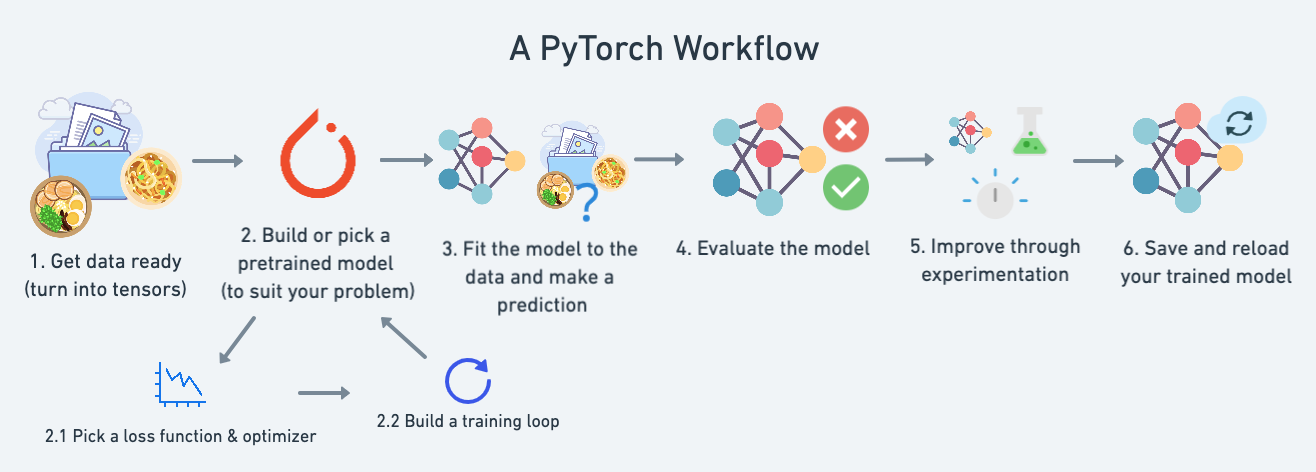

we'll use this workflow to predict a simple straight line but the workflow steps can be repeated and changed depending on the problem you're working on.

Specifically, we're going to cover:

          Topic	                                                                                   Contents

1. Getting data ready	                                     Data can be almost anything but to get started we're going to create a simple straight line
2. Building a model	                                         Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.
3. Fitting the model to data (training)	                     We've got data and a model, now let's let the model (try to) find patterns in the (training) data.
4. Making predictions and evaluating a model (inference)	 Our model's found patterns in the data, let's compare its findings to the actual (testing) data.
5. Saving and loading a model	                             You may want to use your model elsewhere, or come back to it later, here we'll cover that.
6. Putting it all together	                                 Let's take all of the above and combine it.

In [2]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [3]:
what_were_covering[1]

'data (prepare and load)'


And now let's import what we'll need for this module.

We're going to get torch, torch.nn (nn stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and matplotlib.

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu117'

1. Data (preparing and loading)

"data" in machine learning can be almost anything you can imagine. A table of numbers (like a big Excel spreadsheet), images of any kind, videos (YouTube has lots of data!), audio files like songs or podcasts, protein structures, text and more

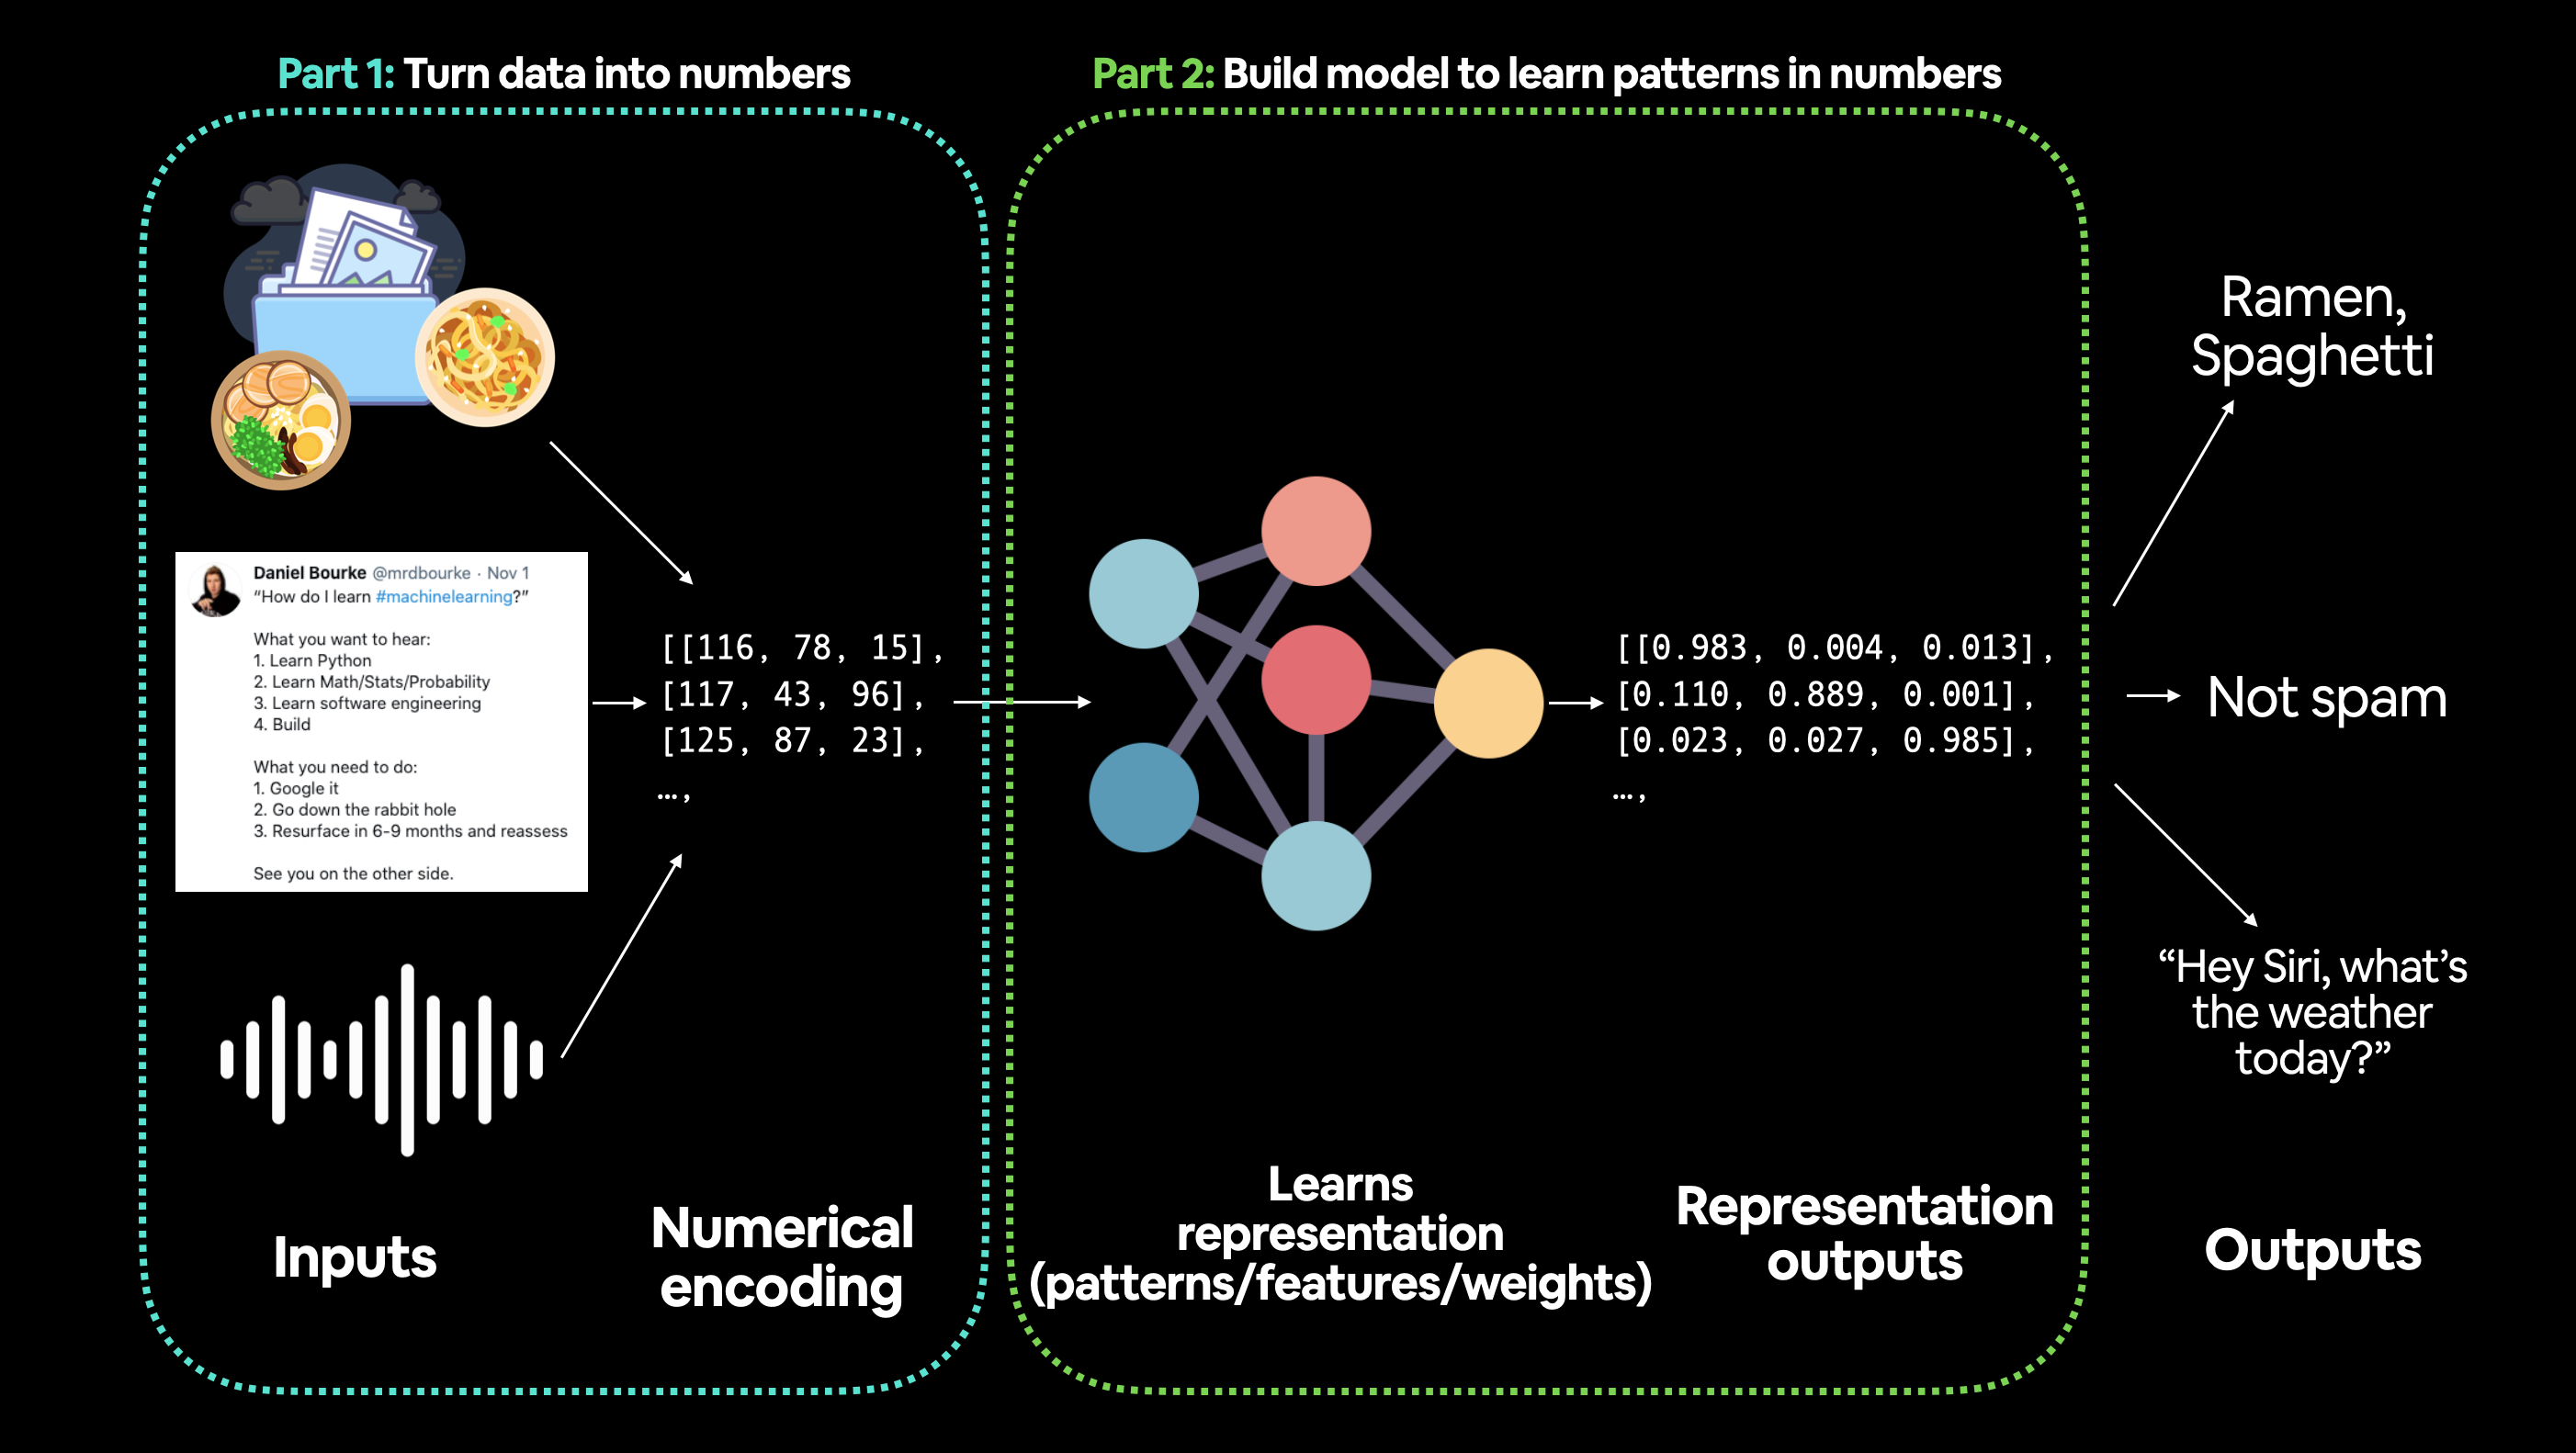

Use linear regression to create the data with known parameters (things that can be learned by a model) and 
then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [6]:
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [9]:
len(X), len(y)

(50, 50)

In [7]:
# Create train/test split

train_split = int(0.8 * len(X))

X_train, y_train = X[0:train_split], y[0:train_split]

X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [10]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels,  c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

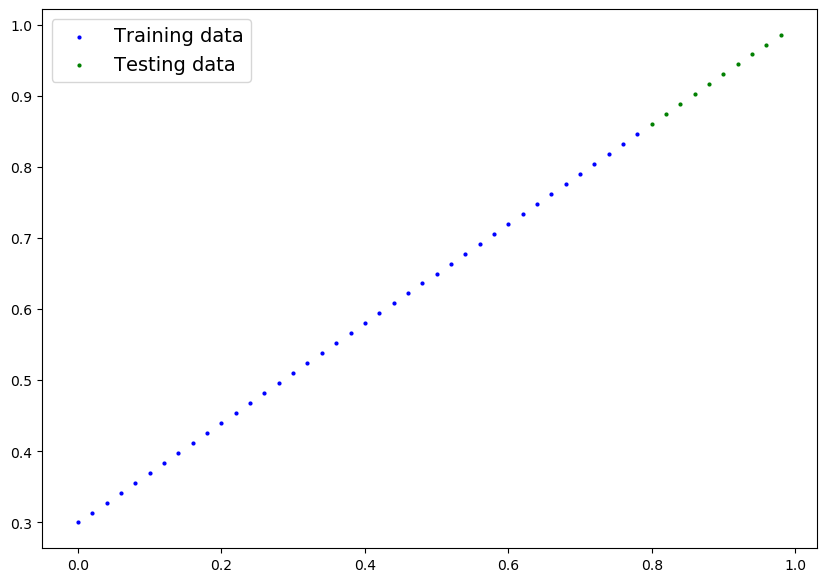

In [11]:
plot_predictions()


2. Build model

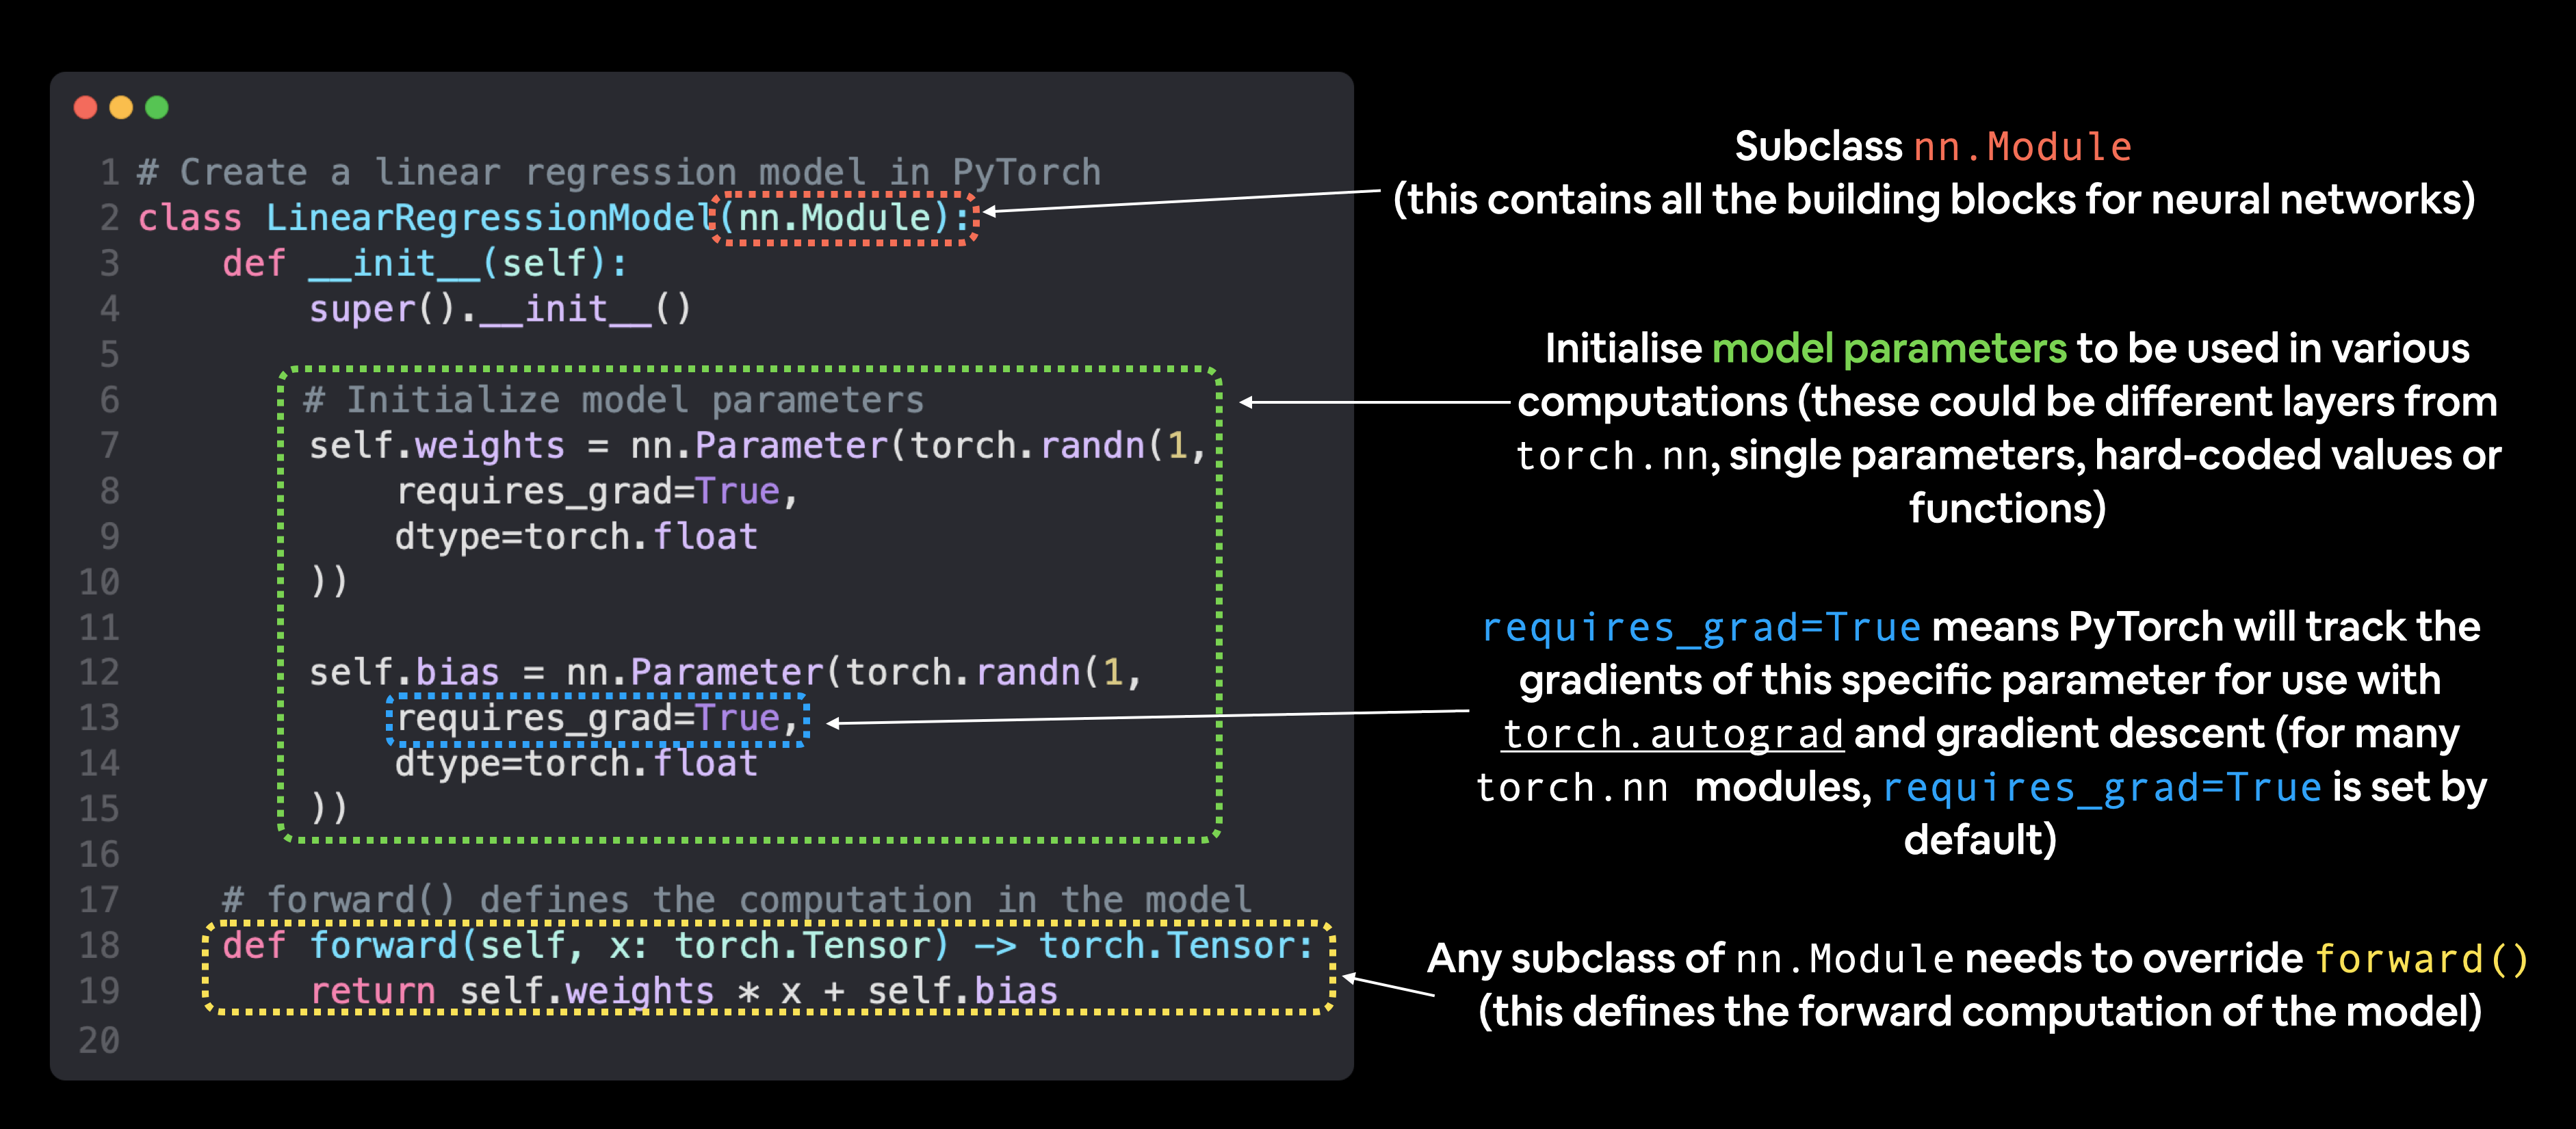

In [14]:
class LinearRegressionMOdel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                 requires_grad=True)
        
    def forward(self, x:torch.Tensor):
        return self.weights * x + self.bias

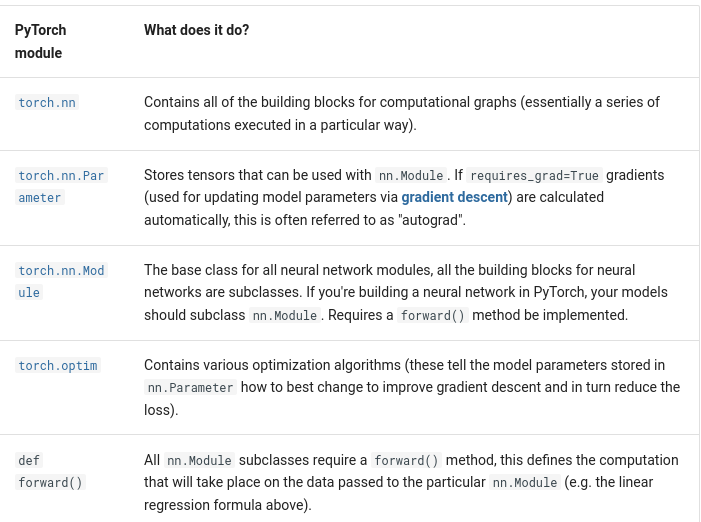

almost everything in a PyTorch neural network comes from torch.nn,

nn.Module contains the larger building blocks (layers)

nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))

forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)

torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

-----------------------------------------------------------------------------------








create a model instance with the class we've made and check its parameters using .parameters().

In [15]:
torch.manual_seed(42)

model_0 = LinearRegressionMOdel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state (what the model contains) of the model using .state_dict().

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


##Making predictions using torch.inference_mode()

In [19]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [20]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


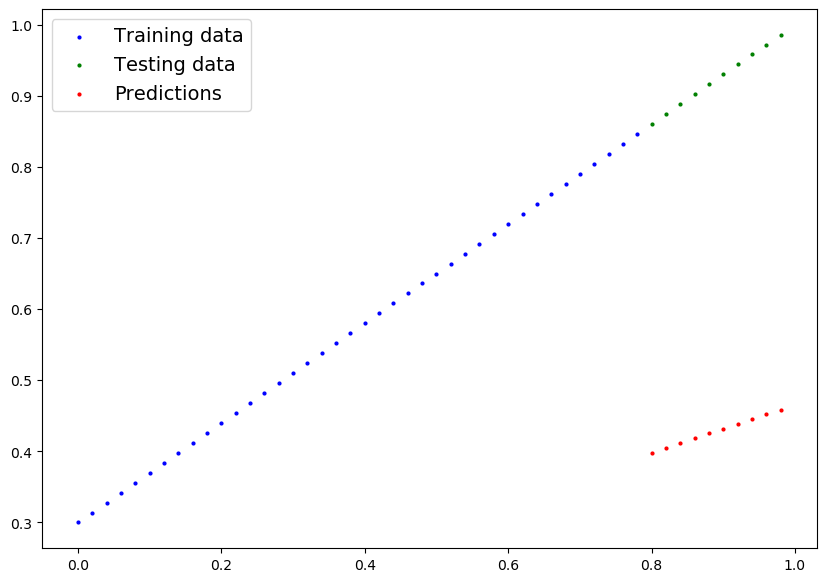

In [21]:
plot_predictions(predictions=y_preds)


3. Train model

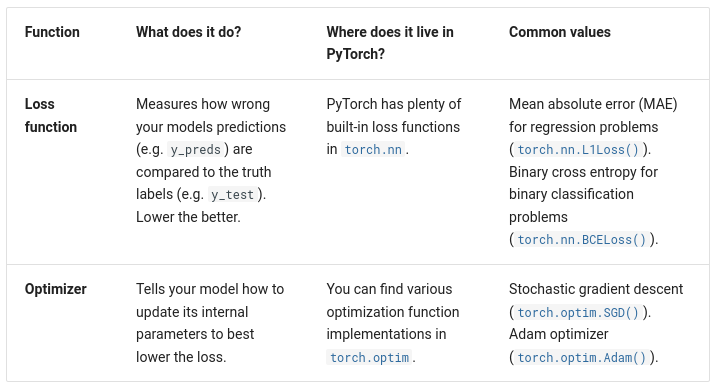